<a href="https://colab.research.google.com/github/Adda2003/STOCK_PRICE_PREDICTION/blob/main/forcasting_using_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 112 kB 66.1 MB/s 
     |████████████████████████████████| 128 kB 76.5 MB/s 
     |████████████████████████████████| 4.0 MB 57.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 110 kB 76.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
# using Yahoo finance API to get stock data
stocksdata="AAPL"
df=yf.download(stocksdata,start="1981-1-1",end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
1981-01-02    0.154018    0.155134    0.154018    0.154018    0.119849   
1981-01-05    0.151228    0.151228    0.150670    0.150670    0.117244   
1981-01-06    0.144531    0.144531    0.143973    0.143973    0.112032   
1981-01-07    0.138393    0.138393    0.137835    0.137835    0.107256   
1981-01-08    0.135603    0.135603    0.135045    0.135045    0.105085   
...                ...         ...         ...         ...         ...   
2020-12-23  132.160004  132.429993  130.779999  130.960007  129.406570   
2020-12-24  131.320007  133.460007  131.100006  131.970001  130.404602   
2020-12-28  133.990005  137.339996  133.509995  136.690002  135.068604   
2020-12-29  138.050003  138.789993  134.339996  134.869995  133.270157   
2020-12-30  135.580002  135.990005  133.399994  133.720001  132.133804   

               Volume  
Date                   
1981-01-02   21660800  
1981-01-05   35728000  
1981-01-06   45158400  
1981-01-07   55686400  
1981-01-08   39827200  
...               ...  
2020-12-23   88223700  
2020-12-24   54930100  
2020-12-28  124486200  
2020-12-29  121047300  
2020-12-30   96452100  

[10086 rows x 6 columns]

In [ ]:
df = df.reset_index()

In [ ]:
df['Date']

0       1981-01-02
1       1981-01-05
2       1981-01-06
3       1981-01-07
4       1981-01-08
           ...    
10081   2020-12-23
10082   2020-12-24
10083   2020-12-28
10084   2020-12-29
10085   2020-12-30
Name: Date, Length: 10086, dtype: datetime64[ns]

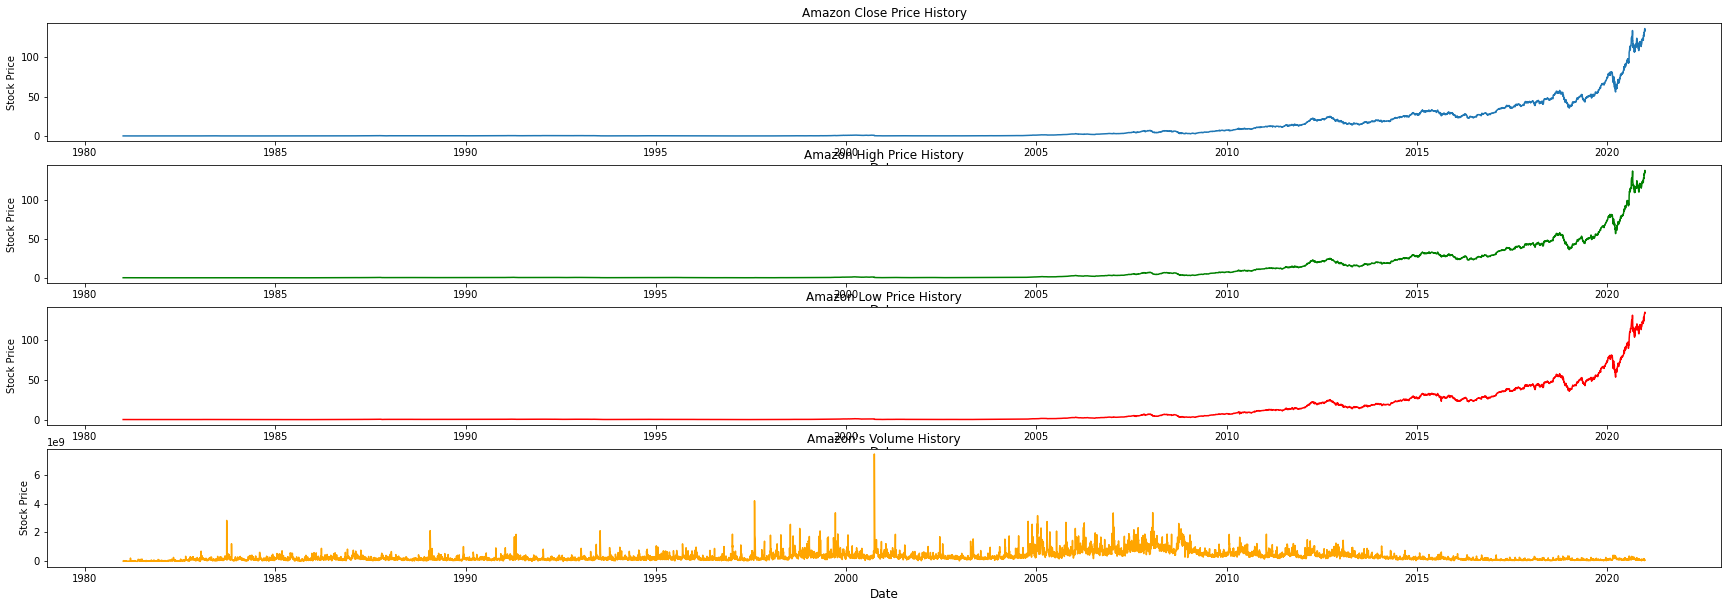

In [ ]:
f, ax = plt.subplots( 4, figsize=(30,10))
ax[0].plot(df["Date"], df["Close"])
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylabel("Stock Price")
ax[0].set_title("Amazon Close Price History")

# Second Subplot
ax[1].plot(df["Date"], df["High"], color="green")
ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylabel("Stock Price")
ax[1].set_title("Amazon High Price History")

# Third Subplot
ax[2].plot(df["Date"], df["Low"], color="red")
ax[2].set_xlabel("Date", fontsize=12)
ax[2].set_ylabel("Stock Price")
ax[2].set_title("Amazon Low Price History")

# Fourth Subplot
ax[3].plot(df["Date"], df["Volume"], color="orange")
ax[3].set_xlabel("Date", fontsize=12)
ax[3].set_ylabel("Stock Price")
ax[3].set_title("Amazon's Volume History")
plt.show()

In [ ]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = prophet.Prophet()

In [ ]:
data = df[['Date','Close']]

In [ ]:
data

Date       Close
0     1981-01-02    0.154018
1     1981-01-05    0.150670
2     1981-01-06    0.143973
3     1981-01-07    0.137835
4     1981-01-08    0.135045
...          ...         ...
10081 2020-12-23  130.960007
10082 2020-12-24  131.970001
10083 2020-12-28  136.690002
10084 2020-12-29  134.869995
10085 2020-12-30  133.720001

[10086 rows x 2 columns]

In [ ]:
data.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
data.columns = ['ds','y']

In [ ]:
data

ds           y
0     1981-01-02    0.154018
1     1981-01-05    0.150670
2     1981-01-06    0.143973
3     1981-01-07    0.137835
4     1981-01-08    0.135045
...          ...         ...
10081 2020-12-23  130.960007
10082 2020-12-24  131.970001
10083 2020-12-28  136.690002
10084 2020-12-29  134.869995
10085 2020-12-30  133.720001

[10086 rows x 2 columns]

In [ ]:
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4illp65/rhfoq1he.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4illp65/flp_suaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30521', 'data', 'file=/tmp/tmpk4illp65/rhfoq1he.json', 'init=/tmp/tmpk4illp65/flp_suaf.json', 'output', 'file=/tmp/tmpk4illp65/prophet_modelku_8y6i4/prophet_model-20221224065631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:56:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:56:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_close1y = model.make_future_dataframe(periods=365,include_history=False)

In [ ]:
future_close1y

ds
0   2020-12-31
1   2021-01-01
2   2021-01-02
3   2021-01-03
4   2021-01-04
..         ...
360 2021-12-26
361 2021-12-27
362 2021-12-28
363 2021-12-29
364 2021-12-30

[365 rows x 1 columns]

In [ ]:
forcast = model.predict(future_close1y)

In [ ]:
forcast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-12-31  75.278215   67.089243   82.935094    75.278215    75.278215   
1   2021-01-01  75.300970   67.729334   83.536198    75.300970    75.300970   
2   2021-01-02  75.323725   67.301272   83.560486    75.323725    75.323725   
3   2021-01-03  75.346480   67.710869   83.152939    75.346480    75.346480   
4   2021-01-04  75.369236   67.397865   83.651236    75.369236    75.369236   
..         ...        ...         ...         ...          ...          ...   
360 2021-12-26  83.470039   75.824437   91.593381    83.069816    83.891985   
361 2021-12-27  83.492794   75.800545   91.966367    83.087010    83.919048   
362 2021-12-28  83.515549   75.748071   91.679333    83.104363    83.946112   
363 2021-12-29  83.538304   75.993869   92.027190    83.123762    83.972804   
364 2021-12-30  83.561060   75.612936   91.818252    83.143665    83.997515   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          0.117397              0.117397              0.117397 -0.005135   
1         -0.009657             -0.009657             -0.009657 -0.058437   
2         -0.026700             -0.026700             -0.026700 -0.001818   
3         -0.099513             -0.099513             -0.099513 -0.001818   
4         -0.144973             -0.144973             -0.144973  0.023951   
..              ...                   ...                   ...       ...   
360        0.479608              0.479608              0.479608 -0.001818   
361        0.443334              0.443334              0.443334  0.023951   
362        0.371045              0.371045              0.371045  0.017406   
363        0.310690              0.310690              0.310690  0.025851   
364        0.208545              0.208545              0.208545 -0.005135   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0       -0.005135     -0.005135  0.122532      0.122532      0.122532   
1       -0.058437     -0.058437  0.048780      0.048780      0.048780   
2       -0.001818     -0.001818 -0.024882     -0.024882     -0.024882   
3       -0.001818     -0.001818 -0.097695     -0.097695     -0.097695   
4        0.023951      0.023951 -0.168924     -0.168924     -0.168924   
..            ...           ...       ...           ...           ...   
360     -0.001818     -0.001818  0.481426      0.481426      0.481426   
361      0.023951      0.023951  0.419383      0.419383      0.419383   
362      0.017406      0.017406  0.353640      0.353640      0.353640   
363      0.025851      0.025851  0.284840      0.284840      0.284840   
364     -0.005135     -0.005135  0.213680      0.213680      0.213680   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
360                   0.0                         0.0   
361                   0.0                         0.0   
362                   0.0                         0.0   
363                   0.0                         0.0   
364                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
0                           0.0  75.395612  
1                           0.0  75.291314  
2                           0.0  75.297026  
3                           0.0  75.246967  
4                           0.0  75.224263  
..                          ...        ...  
360                         0.0  83.949647  
361                         0.0  83.936129  
362                         0.0  83.886595  
363                         0.0  83.848995  
364                         0.0  83.769604  

[365 rows x 19 columns]

In [ ]:
output = forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
output

ds       yhat  yhat_lower  yhat_upper
0   2020-12-31  75.395612   67.089243   82.935094
1   2021-01-01  75.291314   67.729334   83.536198
2   2021-01-02  75.297026   67.301272   83.560486
3   2021-01-03  75.246967   67.710869   83.152939
4   2021-01-04  75.224263   67.397865   83.651236
..         ...        ...         ...         ...
360 2021-12-26  83.949647   75.824437   91.593381
361 2021-12-27  83.936129   75.800545   91.966367
362 2021-12-28  83.886595   75.748071   91.679333
363 2021-12-29  83.848995   75.993869   92.027190
364 2021-12-30  83.769604   75.612936   91.818252

[365 rows x 4 columns]

In [ ]:
stocksdata="AAPL"
df_real=yf.download(stocksdata,start="2020-12-31",end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_real = df_real.reset_index()

In [ ]:
# for (pr,rr) in zip(output[['ds','yhat']],df_real[['Date','Close']]):
#   if[]

<ipython-input-25-038a8f823a50>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


Text(60.0, 0.5, 'Close Price')

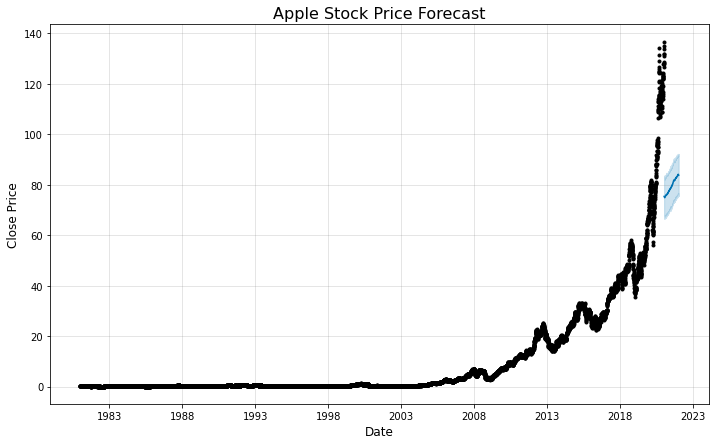

In [ ]:
fig = model.plot(forcast)
ax1 = fig.add_subplot(111)
ax1.set_title("Apple Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

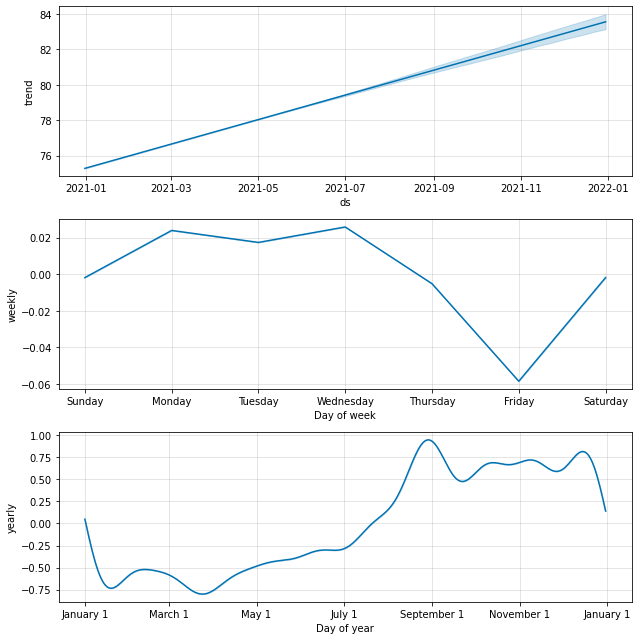

In [ ]:
fig2 = model.plot_components(forcast)
plt.show()

Text(0.5, 1.0, 'forcasted Close Price values')

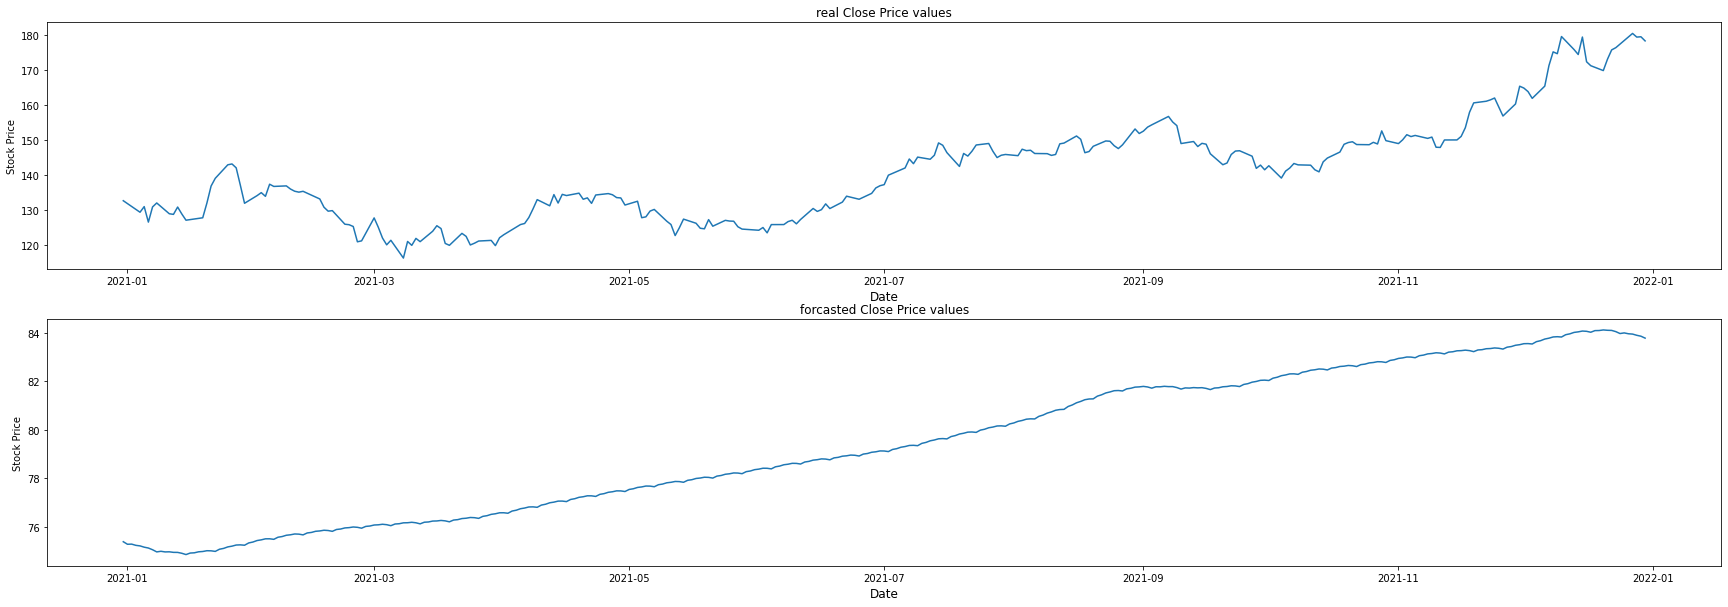

In [ ]:
f, ax1 = plt.subplots( 2, figsize=(30,10))

ax1[0].plot(df_real["Date"], df_real["Close"])
ax1[0].set_xlabel("Date", fontsize=12)
ax1[0].set_ylabel("Stock Price")
ax1[0].set_title("real Close Price values")

ax1[1].plot(output["ds"], output["yhat"])
ax1[1].set_xlabel("Date", fontsize=12)
ax1[1].set_ylabel("Stock Price")
ax1[1].set_title("forcasted Close Price values")

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
alldays = model.make_future_dataframe(periods=365)
allday_forcast = model.predict(alldays)

plot_plotly(model ,allday_forcast)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [ ]:
d = data['y']
data['y']=sc.fit_transform(np.array(d).reshape(-1,1))

<ipython-input-30-3b626f2b7d83>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

ds         y
0     1981-01-02  0.000768
1     1981-01-05  0.000743
2     1981-01-06  0.000694
3     1981-01-07  0.000649
4     1981-01-08  0.000629
...          ...       ...
10081 2020-12-23  0.958065
10082 2020-12-24  0.965457
10083 2020-12-28  1.000000
10084 2020-12-29  0.986680
10085 2020-12-30  0.978264

[10086 rows x 2 columns]

In [ ]:
model_sc = prophet.Prophet()

In [ ]:
model_sc.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4illp65/4bunffeh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4illp65/2uwjx5zw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96079', 'data', 'file=/tmp/tmpk4illp65/4bunffeh.json', 'init=/tmp/tmpk4illp65/2uwjx5zw.json', 'output', 'file=/tmp/tmpk4illp65/prophet_modelg28esl3m/prophet_model-20221224065642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:56:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:56:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
sc_allday_forcast = model_sc.predict(alldays)

plot_plotly(model_sc ,sc_allday_forcast)

In [ ]:
sc_forcast = model_sc.predict(future_close1y)

In [ ]:
d = df_real['Close']
df_real['Close']=sc.fit_transform(np.array(d).reshape(-1,1))

In [ ]:
df_real

Date        Open        High         Low     Close   Adj Close  \
0   2020-12-31  134.080002  134.740005  131.720001  0.255276  131.116013   
1   2021-01-04  133.520004  133.610001  126.760002  0.204002  127.874924   
2   2021-01-05  128.889999  131.740005  128.429993  0.229014  129.455948   
3   2021-01-06  127.720001  131.050003  126.379997  0.160075  125.098274   
4   2021-01-07  128.360001  131.630005  127.860001  0.227607  129.367035   
..         ...         ...         ...         ...       ...         ...   
247 2021-12-23  175.850006  176.850006  175.270004  0.936689  175.262802   
248 2021-12-27  177.089996  180.419998  177.070007  1.000000  179.289444   
249 2021-12-28  180.160004  181.330002  178.529999  0.983742  178.255447   
250 2021-12-29  179.330002  180.630005  178.139999  0.985149  178.344925   
251 2021-12-30  179.470001  180.570007  178.089996  0.966703  177.171738   

        Volume  
0     99116600  
1    143301900  
2     97664900  
3    155088000  
4    109578200  
..         ...  
247   68356600  
248   74919600  
249   79144300  
250   62348900  
251   59773000  

[252 rows x 7 columns]

Text(0.5, 1.0, 'forcasted Close Price values')

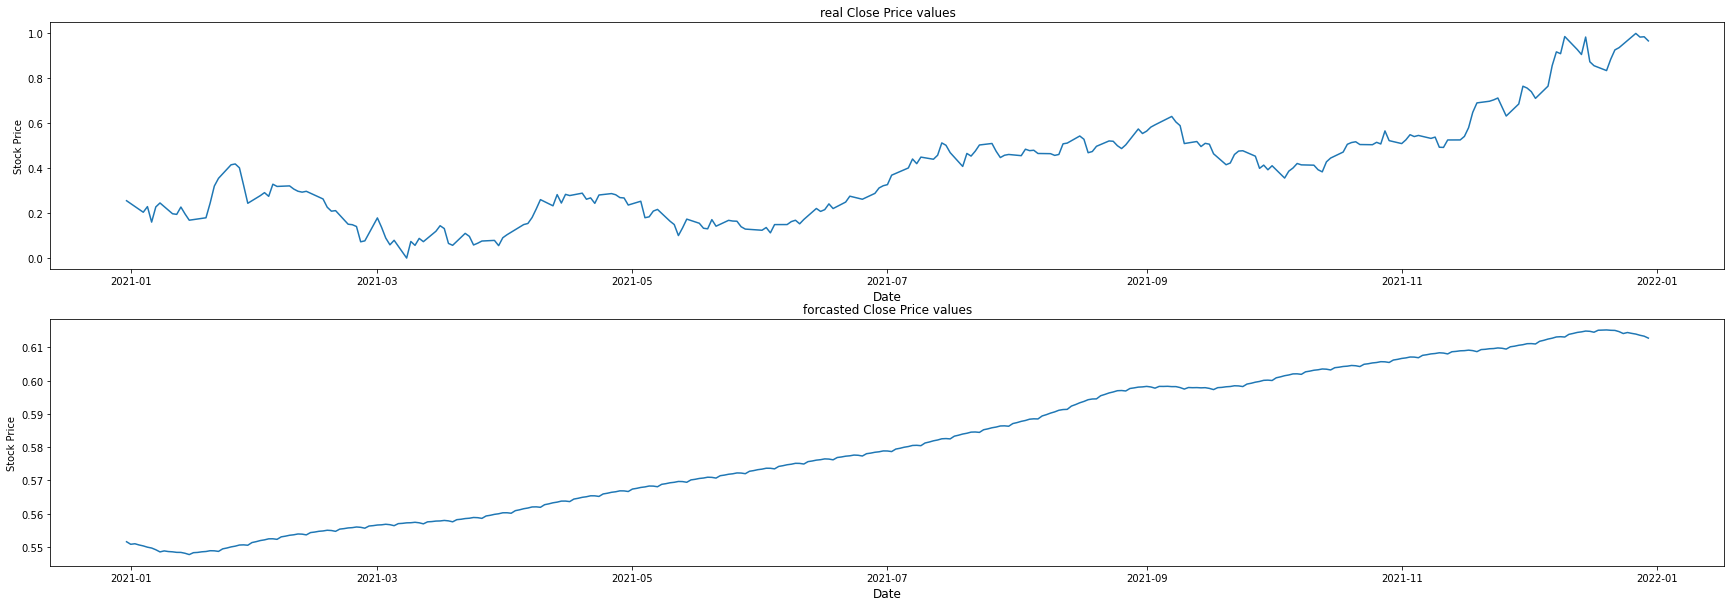

In [ ]:
f, ax1 = plt.subplots( 2, figsize=(30,10))

ax1[0].plot(df_real["Date"], df_real["Close"])
ax1[0].set_xlabel("Date", fontsize=12)
ax1[0].set_ylabel("Stock Price")
ax1[0].set_title("real Close Price values")

ax1[1].plot(sc_forcast["ds"], sc_forcast["yhat"])
ax1[1].set_xlabel("Date", fontsize=12)
ax1[1].set_ylabel("Stock Price")
ax1[1].set_title("forcasted Close Price values")

In [ ]:
wh_date = df_real['Date']

In [ ]:
wh_date = pd.DataFrame(wh_date)

In [ ]:
wh_date.columns = ['ds']

In [ ]:
wh_date

ds
0   2020-12-31
1   2021-01-04
2   2021-01-05
3   2021-01-06
4   2021-01-07
..         ...
247 2021-12-23
248 2021-12-27
249 2021-12-28
250 2021-12-29
251 2021-12-30

[252 rows x 1 columns]

In [ ]:
pred = model_sc.predict(wh_date)

In [ ]:
len(pred['yhat'])

252

In [ ]:
from sklearn.metrics import r2_score
r2_score(pred['yhat'],df_real['Close'])

-181.62896150882304

Text(0.5, 1.0, 'forcasted Close Price values')

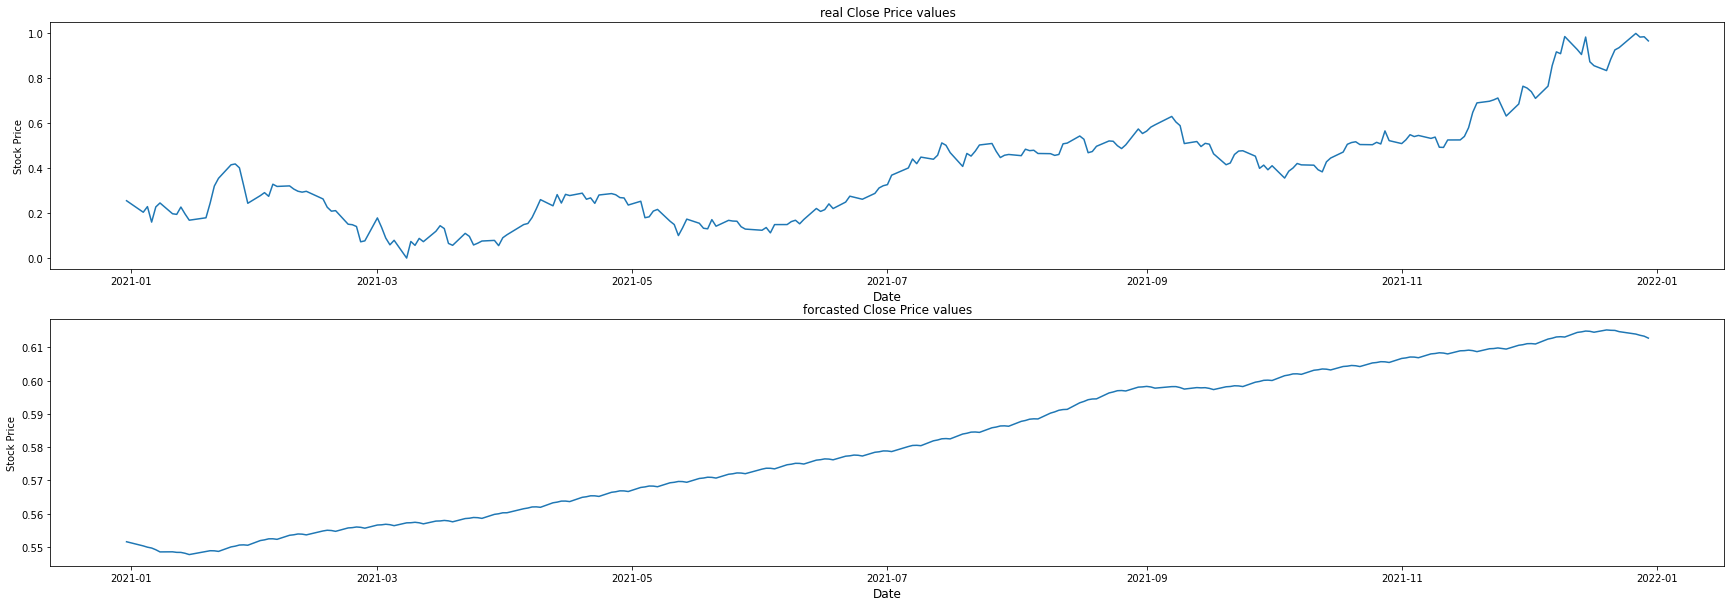

In [ ]:
f, ax1 = plt.subplots( 2, figsize=(30,10))

ax1[0].plot(df_real["Date"], df_real["Close"])
ax1[0].set_xlabel("Date", fontsize=12)
ax1[0].set_ylabel("Stock Price")
ax1[0].set_title("real Close Price values")

ax1[1].plot(pred["ds"], pred["yhat"])
ax1[1].set_xlabel("Date", fontsize=12)
ax1[1].set_ylabel("Stock Price")
ax1[1].set_title("forcasted Close Price values")

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [25,50,100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 50


In [ ]:
data

ds         y
0     1981-01-02  0.000768
1     1981-01-05  0.000743
2     1981-01-06  0.000694
3     1981-01-07  0.000649
4     1981-01-08  0.000629
...          ...       ...
10081 2020-12-23  0.958065
10082 2020-12-24  0.965457
10083 2020-12-28  1.000000
10084 2020-12-29  0.986680
10085 2020-12-30  0.978264

[10086 rows x 2 columns]

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape


In [ ]:
mape(pred['yhat'],df_real['Close'])

0.437716829621123

In [ ]:
new_model1 = prophet.Prophet(changepoint_range=0.9)
new_model1.fit(data)
pred1 = new_model1.predict(wh_date)

mape(pred1['yhat'],df_real['Close'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4illp65/jngkxe06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4illp65/8l21_ns9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25991', 'data', 'file=/tmp/tmpk4illp65/jngkxe06.json', 'init=/tmp/tmpk4illp65/8l21_ns9.json', 'output', 'file=/tmp/tmpk4illp65/prophet_model9ku2l13p/prophet_model-20221224083804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:38:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.5207108574089846

In [ ]:
import itertools
all_params = [dict(zip(params_grid.keys(), v)) for v in itertools.product(*params_grid.values())]
mapes = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = prophet.Prophet(**params).fit(data)
    pred1 = m.predict(wh_date)
    map=mape(pred1['yhat'],df_real['Close'])
    mapes.append(map)

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4illp65/vl59k5vb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4illp65/pn242m5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42480', 'data', 'file=/tmp/tmpk4illp65/vl59k5vb.json', 'init=/tmp/tmpk4illp65/pn242m5z.json', 'output', 'file=/tmp/tmpk4illp65/prophet_modelcrf9tro5/prophet_model-20221224094942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:49:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4i

   seasonality_mode  changepoint_prior_scale  n_changepoints      rmse
0    multiplicative                      0.1              25  0.430725
1    multiplicative                      0.1              50  0.435147
2    multiplicative                      0.1             100  0.435923
3    multiplicative                      0.1             150  0.435341
4    multiplicative                      0.1             200  0.435137
5    multiplicative                      0.2              25  0.430952
6    multiplicative                      0.2              50  0.435516
7    multiplicative                      0.2             100  0.436036
8    multiplicative                      0.2             150  0.435573
9    multiplicative                      0.2             200  0.435673
10   multiplicative                      0.3              25  0.430953
11   multiplicative                      0.3              50  0.435832
12   multiplicative                      0.3             100  0.435750
13   m

In [ ]:
tuning_results['mape'][0]

<function sklearn.metrics._regression.mean_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [ ]:
mape(pred1['yhat'],df_real['Close'])

0.44282468919904

In [ ]:
min(tuning_results['mape'])

0.43072457760166066

In [ ]:
wh_date[0:20]

ds
0  2020-12-31
1  2021-01-04
2  2021-01-05
3  2021-01-06
4  2021-01-07
5  2021-01-08
6  2021-01-11
7  2021-01-12
8  2021-01-13
9  2021-01-14
10 2021-01-15
11 2021-01-19
12 2021-01-20
13 2021-01-21
14 2021-01-22
15 2021-01-25
16 2021-01-26
17 2021-01-27
18 2021-01-28
19 2021-01-29

In [ ]:
month_for = model_sc.predict(wh_date[0:20])

In [ ]:
month_for

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2020-12-31  0.550672    0.494225    0.609196     0.550672     0.550672   
1  2021-01-04  0.551338    0.490489    0.607686     0.551338     0.551338   
2  2021-01-05  0.551505    0.491767    0.608254     0.551505     0.551505   
3  2021-01-06  0.551671    0.488791    0.608568     0.551671     0.551671   
4  2021-01-07  0.551838    0.491100    0.609736     0.551838     0.551838   
5  2021-01-08  0.552005    0.483920    0.609814     0.552005     0.552005   
6  2021-01-11  0.552504    0.491013    0.606022     0.552504     0.552504   
7  2021-01-12  0.552671    0.491927    0.608374     0.552671     0.552671   
8  2021-01-13  0.552838    0.490244    0.609722     0.552838     0.552838   
9  2021-01-14  0.553004    0.489670    0.603455     0.553004     0.553004   
10 2021-01-15  0.553171    0.489493    0.605489     0.553171     0.553171   
11 2021-01-19  0.553837    0.497357    0.607495     0.553837     0.553837   
12 2021-01-20  0.554004    0.488636    0.606336     0.554004     0.554004   
13 2021-01-21  0.554170    0.486646    0.606220     0.554170     0.554170   
14 2021-01-22  0.554337    0.491687    0.609174     0.554337     0.554337   
15 2021-01-25  0.554837    0.486472    0.604817     0.554837     0.554837   
16 2021-01-26  0.555003    0.491002    0.608498     0.555003     0.555003   
17 2021-01-27  0.555170    0.490171    0.609303     0.555170     0.555170   
18 2021-01-28  0.555336    0.494596    0.606655     0.555336     0.555336   
19 2021-01-29  0.555503    0.495014    0.607387     0.555503     0.555503   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         0.000827              0.000827              0.000827 -0.000070   
1        -0.001094             -0.001094             -0.001094  0.000141   
2        -0.001645             -0.001645             -0.001645  0.000095   
3        -0.002065             -0.002065             -0.002065  0.000157   
4        -0.002749             -0.002749             -0.002749 -0.000070   
5        -0.003567             -0.003567             -0.003567 -0.000460   
6        -0.004040             -0.004040             -0.004040  0.000141   
7        -0.004369             -0.004369             -0.004369  0.000095   
8        -0.004550             -0.004550             -0.004550  0.000157   
9        -0.004980             -0.004980             -0.004980 -0.000070   
10       -0.005534             -0.005534             -0.005534 -0.000460   
11       -0.005276             -0.005276             -0.005276  0.000095   
12       -0.005209             -0.005209             -0.005209  0.000157   
13       -0.005407             -0.005407             -0.005407 -0.000070   
14       -0.005745             -0.005745             -0.005745 -0.000460   
15       -0.004892             -0.004892             -0.004892  0.000141   
16       -0.004834             -0.004834             -0.004834  0.000095   
17       -0.004662             -0.004662             -0.004662  0.000157   
18       -0.004777             -0.004777             -0.004777 -0.000070   
19       -0.005056             -0.005056             -0.005056 -0.000460   

    weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      -0.000070     -0.000070  0.000897      0.000897      0.000897   
1       0.000141      0.000141 -0.001235     -0.001235     -0.001235   
2       0.000095      0.000095 -0.001739     -0.001739     -0.001739   
3       0.000157      0.000157 -0.002222     -0.002222     -0.002222   
4      -0.000070     -0.000070 -0.002679     -0.002679     -0.002679   
5      -0.000460     -0.000460 -0.003107     -0.003107     -0.003107   
6       0.000141      0.000141 -0.004181     -0.004181     -0.004181   
7       0.000095      0.000095 -0.004464     -0.004464     -0.004464   
8       0.000157      0.000157 -0.004707     -0.004707     -0.004707   
9      -0.000070     -0.000070 -0.004910     -0.004910     -0.004910   
10  

In [ ]:
mape(month_for['yhat'],df_real['Close'][0:20])

0.5260040588373808

Text(0.5, 1.0, 'forcasted Close Price values')

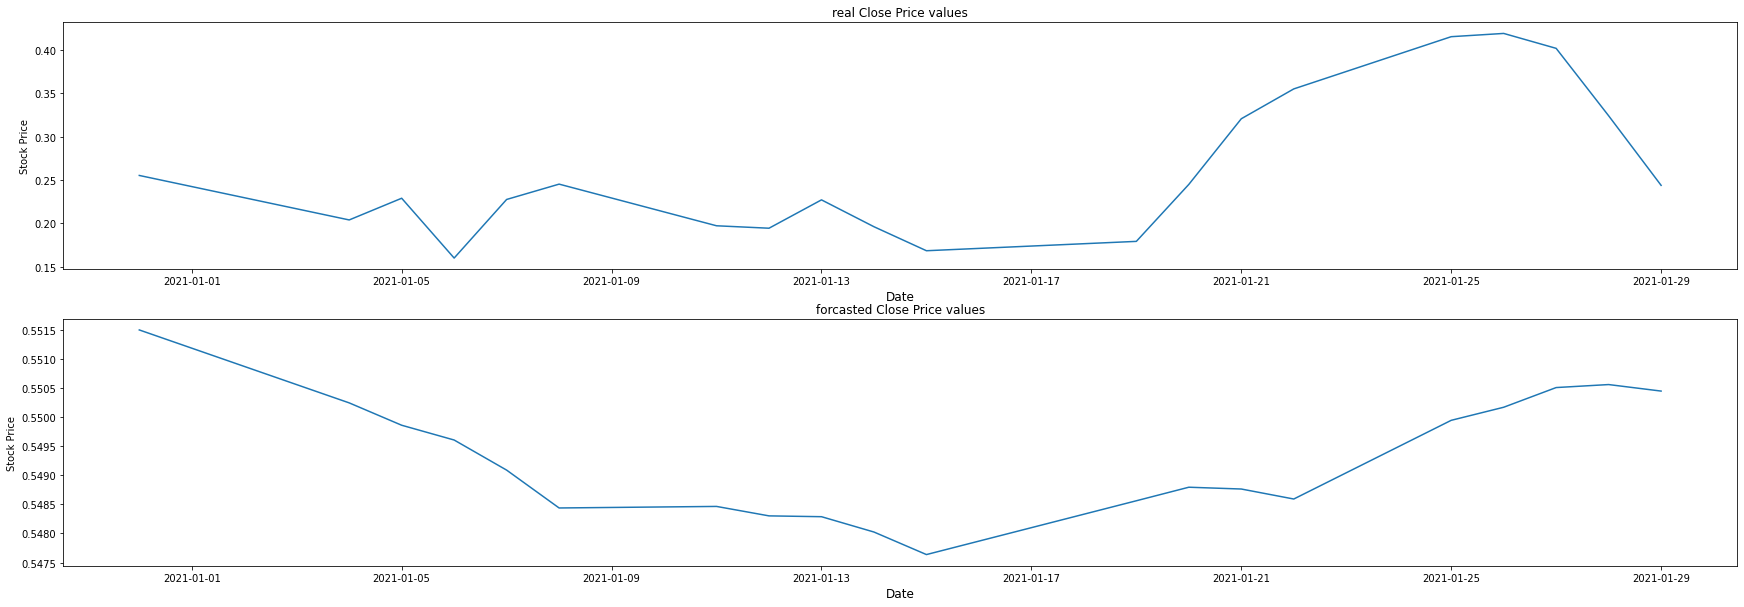

In [ ]:
f, ax1 = plt.subplots( 2, figsize=(30,10))

ax1[0].plot(df_real["Date"][0:20], df_real["Close"][0:20])
ax1[0].set_xlabel("Date", fontsize=12)
ax1[0].set_ylabel("Stock Price")
ax1[0].set_title("real Close Price values")

ax1[1].plot(month_for["ds"], month_for["yhat"])
ax1[1].set_xlabel("Date", fontsize=12)
ax1[1].set_ylabel("Stock Price")
ax1[1].set_title("forcasted Close Price values")